# Project 6

Forecast annual S&P500 returns using lagged log price dividend ratio

1) full sample

2) out-of-sample

In [32]:
import yfinance as yf
import vectorbt as vbt
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Get log price to dividend ratio

In [33]:
start_date = '2000-01-01'
end_date = '2023-12-31'
ticker = ["SPY"]

div = vbt.YFData.download(ticker, start=start_date,end=end_date).get("Dividends")
div.index = pd.to_datetime(div.index.date)
# Annual Dividends
div_12m = div.rolling("365D").sum()

# Download the daily data from stocks
price = yf.download(ticker, start=start_date,end=end_date, progress=False)['Adj Close']
daily_returns = price.pct_change()
data = pd.DataFrame({"Price":price,"Annual_Dividends":div_12m})

In [34]:
# Drop where Annual Dividends equal to 0
data["Annual_Dividends"] = data["Annual_Dividends"].replace(0,np.nan)
data["PD_Ratio"] = data['Price'] / data['Annual_Dividends']
data["Log_PD_Ratio"] = np.log(data['Price'] / data['Annual_Dividends'])
data = data.dropna()
data

,Price,Annual_Dividends,PD_Ratio,Log_PD_Ratio
2000-03-17,94.202950,0.371,253.916306,5.537005
2000-03-20,93.722122,0.371,252.620275,5.531887
2000-03-21,95.645454,0.371,257.804459,5.552201
2000-03-22,96.226486,0.371,259.370583,5.558258
2000-03-23,97.869278,0.371,263.798593,5.575186
...,...,...,...,...
2023-12-22,469.225250,6.633,70.741030,4.259026
2023-12-26,471.206573,6.633,71.039737,4.263239
2023-12-27,472.058533,6.633,71.168179,4.265046
2023-12-28,472.236847,6.633,71.195062,4.265423


In [35]:
from statsmodels.tsa.arima.model import ARIMA

mod = ARIMA(data["Log_PD_Ratio"], order=(2,1,1))
res = mod.fit()
print(res.summary())

/home/pedro/Documents/quantitativeFinance/quant_fin/env/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/pedro/Documents/quantitativeFinance/quant_fin/env/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/pedro/Documents/quantitativeFinance/quant_fin/env/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:           Log_PD_Ratio   No. Observations:                 5985
Model:                 ARIMA(2, 1, 1)   Log Likelihood               10584.038
Date:                Wed, 09 Oct 2024   AIC                         -21160.077
Time:                        11:48:05   BIC                         -21133.290
Sample:                             0   HQIC                        -21150.773
                               - 5985                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4519      0.017     25.973      0.000       0.418       0.486
ar.L2          0.1232      0.014      8.557      0.000       0.095       0.151
ma.L1         -0.8465      0.017    -49.794      0.0

<Axes: >

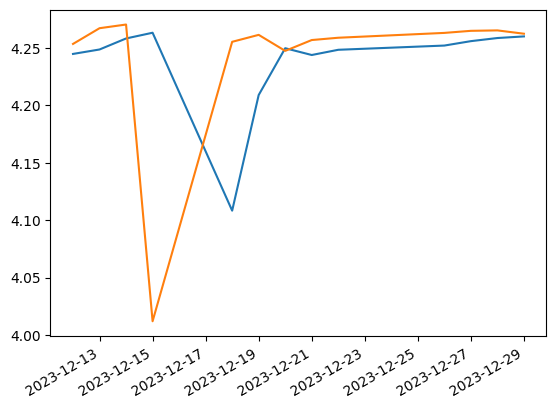

In [56]:
res.predict(start="2023-12-12").plot()
data['Log_PD_Ratio'].loc[data.index>="2023-12-12"].plot()